<a href="https://colab.research.google.com/github/GabeMaldonado/UoL_Study_Materials/blob/main/exe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import geopandas
import matplotlib.pyplot as plt 

In [ ]:
geomapdf = geopandas.read_file('Westminster_Parliamentary_Constituencies__December_2016__Boundaries.geojson')
geomapdf.head(2)

,objectid,pcon16cd,pcon16nm,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
0,1,E14000530,Aldershot,484884,155126,-0.78410,51.288952,5.297875e+07,36261.407252,"POLYGON ((-0.77547 51.33196, -0.80453 51.34164..."
1,2,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,4.285727e+07,33431.104773,"POLYGON ((-1.90508 52.64321, -1.91801 52.64989..."


In [ ]:
data2017 = pd.read_csv('HoC-GE2017-constituency-results.csv')
pd.set_option('display.max_columns', 40)
data2017.head()

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,lab,ld,ukip,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2017-06-09 02:41:00,Lab hold,Lab,Con,49892,33268,57,16761,5901,22662,599,1345,0,0,2761,0,0,0,0,0,0,0
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2017-06-09 02:31:00,Con hold,Con,Lab,45251,32150,78,635,14337,13702,941,0,0,0,3170,0,0,0,0,0,0,0
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2017-06-09 02:26:00,SNP hold,SNP,Lab,62130,36757,55,4139,8341,11031,1693,0,0,15170,0,0,0,0,0,0,522,0
3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2017-06-09 03:08:00,Con gain from SNP,Con,SNP,64964,44493,63,4752,18746,9143,2610,0,0,13994,0,0,0,0,0,0,0,0
4,S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2017-06-09 03:10:00,SNP hold,SNP,Lab,64146,38002,47,195,8813,14096,802,0,0,14291,0,0,0,0,0,0,0,0


In [ ]:
data2017short = data2017[['constituency_name', 'first_party', 'second_party', 'con']]
data2017short.columns = ['constituency_name', 'first_party_2017', 'second_party_2017', 'con_2017']
data2017short


,constituency_name,first_party_2017,second_party_2017,con_2017
0,Aberavon,Lab,Con,5901
1,Aberconwy,Con,Lab,14337
2,Aberdeen North,SNP,Lab,8341
3,Aberdeen South,Con,SNP,18746
4,Airdrie and Shotts,SNP,Lab,8813
...,...,...,...,...
645,Wythenshawe and Sale East,Lab,Con,13581
646,Yeovil,Con,LD,32369
647,Ynys Mon,Lab,Con,10384
648,York Central,Lab,Con,16019


In [ ]:
data2019 = pd.read_csv('HoC-GE2019-results-by-constituency-csv.csv')
data2019short = data2019[['constituency_name', 'first_party', 'second_party', 'con']]
data2019short.columns = ['constituency_name', 'first_party_2019', 'second_party_2019', 'con_2019']
data2019short

,constituency_name,first_party_2019,second_party_2019,con_2019
0,Aberavon,Lab,Con,6518
1,Aberconwy,Con,Lab,14687
2,Aberdeen North,SNP,Con,7535
3,Aberdeen South,SNP,Con,16398
4,Airdrie and Shotts,SNP,Lab,7011
...,...,...,...,...
645,Wythenshawe and Sale East,Lab,Con,13459
646,Yeovil,Con,LD,34588
647,Ynys Mon,Con,Lab,12959
648,York Central,Lab,Con,13767


In [ ]:
data20172019short = pd.merge(left=data2017short, right=data2019short)
data20172019short

,constituency_name,first_party_2017,second_party_2017,con_2017,first_party_2019,second_party_2019,con_2019
0,Aberavon,Lab,Con,5901,Lab,Con,6518
1,Aberconwy,Con,Lab,14337,Con,Lab,14687
2,Aberdeen North,SNP,Lab,8341,SNP,Con,7535
3,Aberdeen South,Con,SNP,18746,SNP,Con,16398
4,Airdrie and Shotts,SNP,Lab,8813,SNP,Lab,7011
...,...,...,...,...,...,...,...
645,Wythenshawe and Sale East,Lab,Con,13581,Lab,Con,13459
646,Yeovil,Con,LD,32369,Con,LD,34588
647,Ynys Mon,Lab,Con,10384,Con,Lab,12959
648,York Central,Lab,Con,16019,Lab,Con,13767


In [ ]:
geocombined = pd.merge(left=geomapdf, right=data20172019short, left_on='pcon16nm', right_on='constituency_name')
geocombined.head()

,objectid,pcon16cd,pcon16nm,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry,constituency_name,first_party_2017,second_party_2017,con_2017,first_party_2019,second_party_2019,con_2019
0,1,E14000530,Aldershot,484884,155126,-0.78410,51.288952,5.297875e+07,36261.407252,"POLYGON ((-0.77547 51.33196, -0.80453 51.34164...",Aldershot,Con,Lab,26950,Con,Lab,27980
1,2,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,4.285727e+07,33431.104773,"POLYGON ((-1.90508 52.64321, -1.91801 52.64989...",Aldridge-Brownhills,Con,Lab,26317,Con,Lab,27850
2,3,E14000532,Altrincham and Sale West,374132,389051,-2.39049,53.397659,5.337464e+07,38251.282780,"POLYGON ((-2.31599 53.43467, -2.34348 53.43827...",Altrincham and Sale West,Con,Lab,26933,Con,Lab,26311
3,4,E14000533,Amber Valley,440478,349675,-1.39770,53.042831,1.278750e+08,50232.258183,"POLYGON ((-1.33164 53.08099, -1.36074 53.09040...",Amber Valley,Con,Lab,25905,Con,Lab,29096
4,5,E14000534,Arundel and South Downs,510689,115542,-0.42631,50.928711,6.473297e+08,188575.899194,"POLYGON ((-0.48001 51.04827, -0.51991 51.03725...",Arundel and South Downs,Con,Lab,37573,Con,LD,35566


#### Visualizing the first parties from 2017 and 2019 side by side

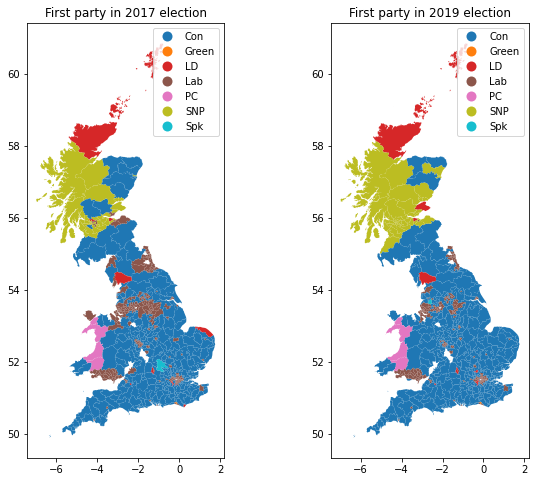

In [ ]:
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

geocombined.plot(column = 'first_party_2017', ax = ax1,legend=True)
geocombined.plot(column = 'first_party_2019', ax = ax2, legend=True)
ax1.set_title('First party in 2017 election')
ax2.set_title('First party in 2019 election')
plt.show()

#### visulaizing the difference of con in 2019 and 2017

In [ ]:
geocombined['con_change'] = geocombined['con_2019'] - geocombined['con_2017']
signs = geocombined['con_change'].gt(0)
colors = signs.replace({False: 'Red', True:'Green'})

In [ ]:
geocombined['constituency_centroid'] = geocombined.centroid
geocombined_centered = geocombined.rename(columns={'geometry': 'borders'}).set_geometry('constituency_centroid')
geocombined_centered.columns

<ipython-input-10-bea27c55d752>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geocombined['constituency_centroid'] = geocombined.centroid


Index(['objectid', 'pcon16cd', 'pcon16nm', 'bng_e', 'bng_n', 'long', 'lat',
       'st_areashape', 'st_lengthshape', 'borders', 'constituency_name',
       'first_party_2017', 'second_party_2017', 'con_2017', 'first_party_2019',
       'second_party_2019', 'con_2019', 'con_change', 'constituency_centroid'],
      dtype='object')

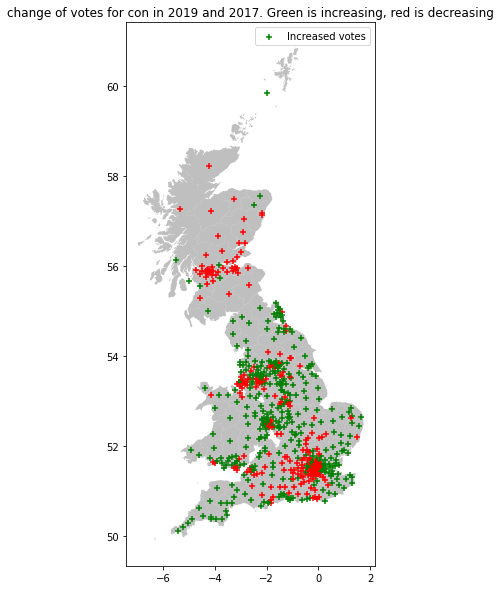

In [ ]:
basemap = geocombined.plot(figsize=(10,10), facecolor = 'grey', alpha = 0.5)
geocombined_centered.plot(ax=basemap, marker = '+', color = colors, legend=True)
basemap.set_title('change of votes for con in 2019 and 2017. Green is increasing, red is decreasing')
plt.legend(['Increased votes', 'Decreased vote']) # this is the line. How can I get the legend for red cross out?
plt.show()

### first party change 

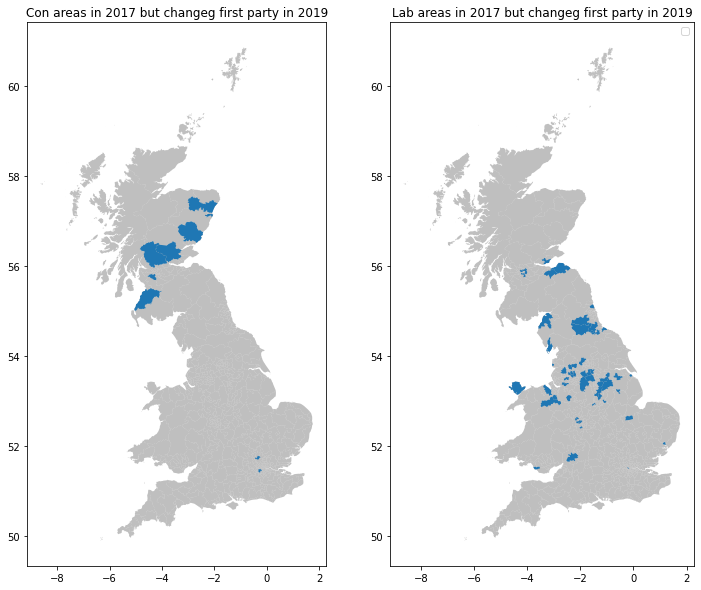

In [ ]:
pd.set_option('display.max_columns', 40)
geocombined.head()

# Con as first part in 2017 but changed to others in 2019
filt1 = (geocombined['first_party_2019'] != geocombined['first_party_2017']) & (geocombined['first_party_2017'] == 'Con')
firstpartychangecon = geocombined.loc[filt1]

# Lab as first part in 2017 but changed to others in 2019
filt2 = (geocombined['first_party_2019'] != geocombined['first_party_2017']) & (geocombined['first_party_2017'] == 'Lab')
firstpartychangelab = geocombined.loc[filt2]

# visualization
fig,(ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,10))
geomapdf.plot(ax = ax1, facecolor = 'grey', alpha = 0.5)
firstpartychangecon.plot(ax = ax1, legend=True)
ax1.set_title('Con areas in 2017 but changeg first party in 2019')
#ax1.legend('areas changed first party from Con')

geomapdf.plot(ax = ax2, facecolor = 'grey', alpha = 0.5)
firstpartychangelab.plot(ax = ax2)
ax2.set_title('Lab areas in 2017 but changeg first party in 2019')
#ax2.legend('areas changed first party from lab')
plt.show()

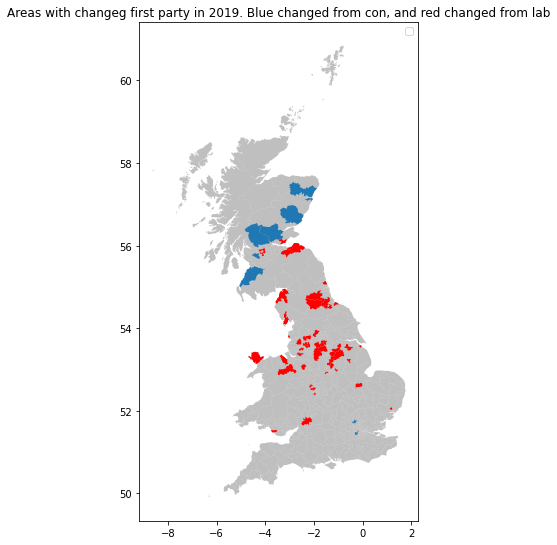

In [ ]:
# or put them into the same figure

basemap = geomapdf.plot(facecolor = 'grey', alpha = 0.5, figsize=(5,10))
firstpartychangecon.plot(ax = basemap, legend=True)
firstpartychangelab.plot(ax = basemap, color='r', legend=True)
basemap.set_title('Areas with changeg first party in 2019. Blue changed from con, and red changed from lab')
#plt.legend('areas')
plt.show()